In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

In [3]:
gray_img = data.page()

if gray_img is None:
    print(f"Error: Could not load image skimage.data.page()")
else:
    print("Benchmark image 'page' loaded successfully.")
    print(f"Image shape: {gray_img.shape}, Data type: {gray_img.dtype}")

Benchmark image 'page' loaded successfully.
Image shape: (191, 384), Data type: uint8


In [4]:
sobelx_64f_orig = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobely_64f_orig = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag_orig = cv2.magnitude(sobelx_64f_orig, sobely_64f_orig)
sobel_original = cv2.convertScaleAbs(sobel_mag_orig)
sobel_magnitude = cv2.magnitude(sobelx_64f_orig, sobely_64f_orig)
    
sobel_final = cv2.convertScaleAbs(sobel_magnitude)
print("Sobel filter applied.")

Sobel filter applied.


In [5]:
scharrx_64f_orig = cv2.Scharr(gray_img, cv2.CV_64F, 1, 0)
scharry_64f_orig = cv2.Scharr(gray_img, cv2.CV_64F, 0, 1)
scharr_mag_orig = cv2.magnitude(scharrx_64f_orig, scharry_64f_orig)
scharr_original = cv2.convertScaleAbs(scharr_mag_orig)
print("Scharr filter applied to original image.")

Scharr filter applied to original image.


In [6]:
otsu_threshold, binary_mask = cv2.threshold(
    gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)
print(f"Otsu's threshold calculated: {otsu_threshold}")
print("Binary mask created.")

Otsu's threshold calculated: 157.0
Binary mask created.


In [7]:
text_only = cv2.bitwise_and(gray_img, gray_img, mask=binary_mask)
print("Text separated from background using the mask.")

Text separated from background using the mask.


In [8]:
inverse_mask = cv2.bitwise_not(binary_mask)
background_only = cv2.bitwise_and(gray_img, gray_img, mask=inverse_mask)
print("Background separated from text using the inverse mask.")

Background separated from text using the inverse mask.


In [9]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray_img)
print("CLAHE applied to enhance contrast.")

CLAHE applied to enhance contrast.


In [10]:
scharrx_64f_clahe = cv2.Scharr(clahe_img, cv2.CV_64F, 1, 0)
scharry_64f_clahe = cv2.Scharr(clahe_img, cv2.CV_64F, 0, 1)
scharr_mag_clahe = cv2.magnitude(scharrx_64f_clahe, scharry_64f_clahe)
scharr_clahe = cv2.convertScaleAbs(scharr_mag_clahe)
print("Scharr filter applied to CLAHE-enhanced image.")

Scharr filter applied to CLAHE-enhanced image.


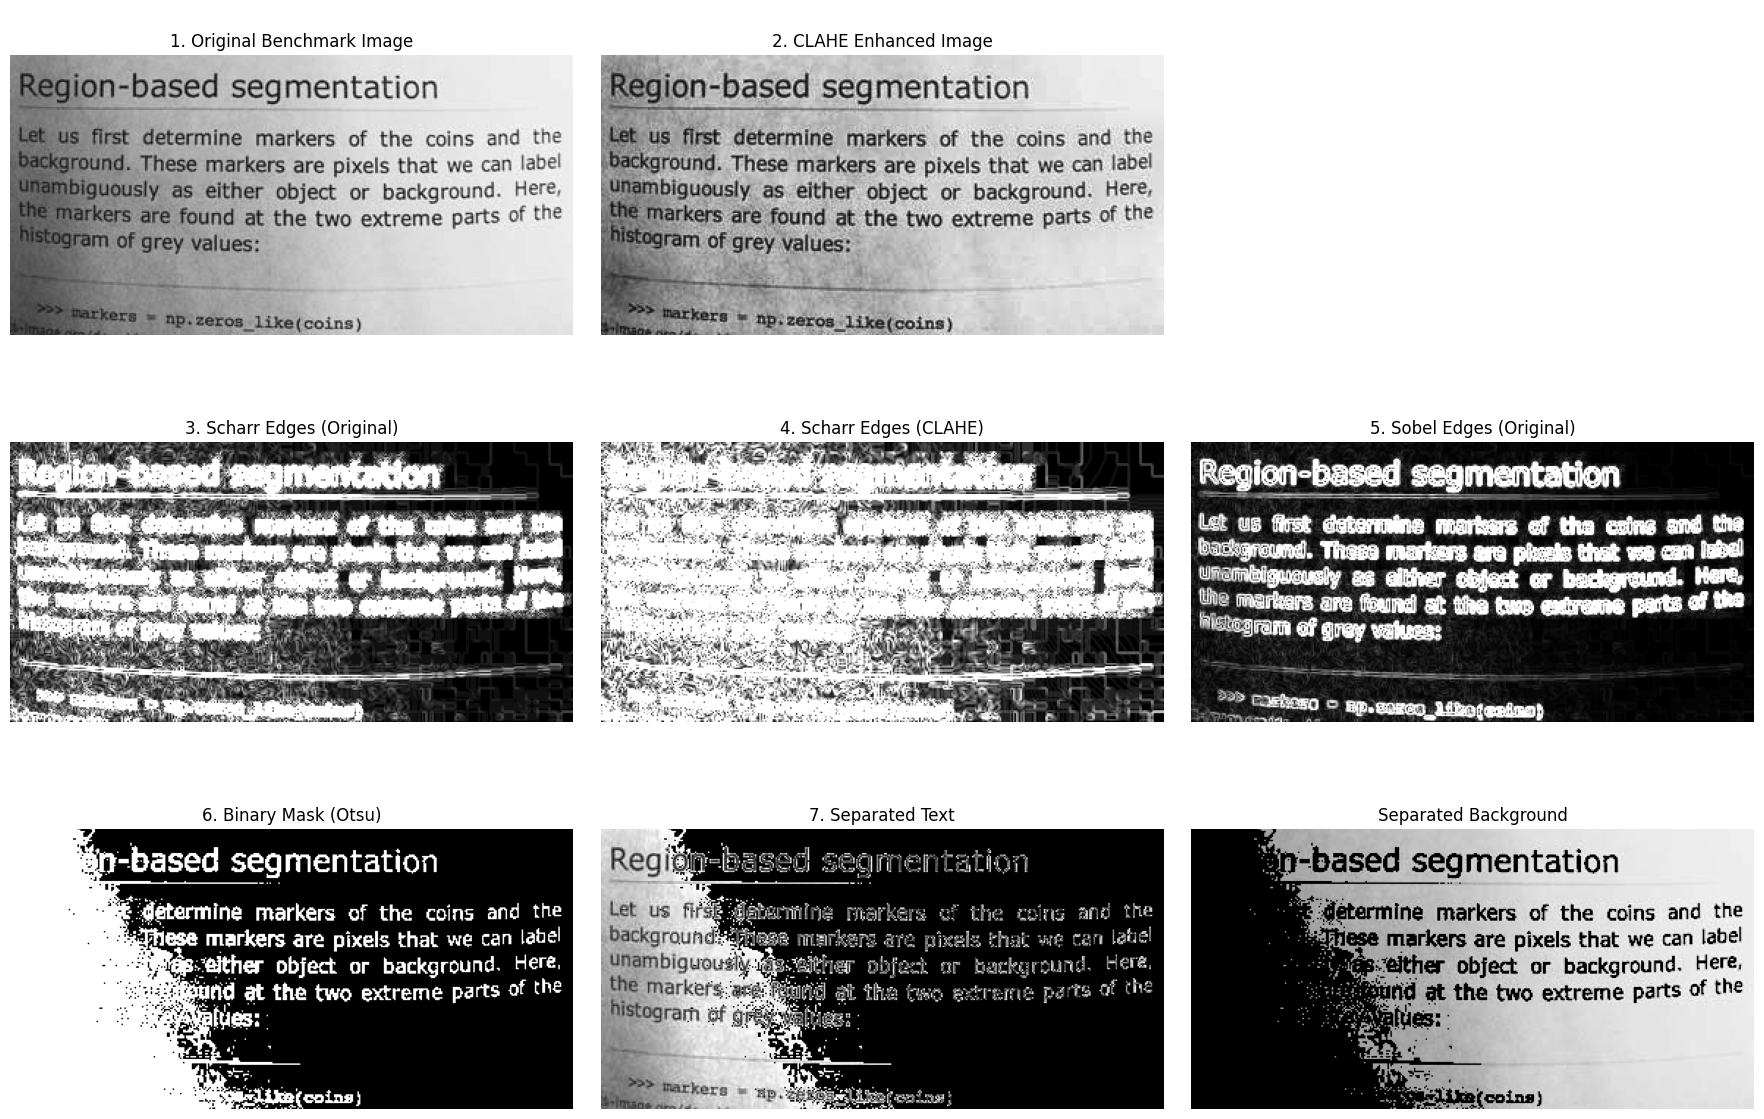

In [14]:
plt.figure(figsize=(18, 12)) 

plt.subplot(3, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('1. Original Benchmark Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title('2. CLAHE Enhanced Image')
plt.axis('off')

plt.subplot(3, 3, 3).axis('off')


plt.subplot(3, 3, 4)
plt.imshow(scharr_original, cmap='gray')
plt.title('3. Scharr Edges (Original)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(scharr_clahe, cmap='gray')
plt.title('4. Scharr Edges (CLAHE)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(sobel_original, cmap='gray')
plt.title('5. Sobel Edges (Original)')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(binary_mask, cmap='gray')
plt.title('6. Binary Mask (Otsu)')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(text_only, cmap='gray')
plt.title('7. Separated Text')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(background_only, cmap='gray')
plt.title('Separated Background')
plt.axis('off')


plt.tight_layout(pad=2.0) 
plt.show()